In [1]:
from network import CNetwork

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
name_dataset = "dataset_1"
dataset_path = "datasetsv2/"
length_cut = 500
random_flag = 1
dimension = 2
feature_selection = 'top_50'
lemmatization_flag = True

In [5]:
df = pd.read_csv(dataset_path + name_dataset + ".csv")

In [6]:
df.head(5)

,label,text,book
0,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Christine Gehring,...",Right Ho Jeeves
1,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...",Tales Of St Austin
2,Joseph Conrad,And that last\n\nword was the single word of ...,Victory
3,Joseph Conrad,\n\n\n\nIf I have ever had these gifts in any ...,Under Western Eyes
4,Bram Stoker,\n\n\n\n Lond...,The Lady Of The Shroud


In [7]:
from utils.text_processing import get_min_len_corpus

In [8]:
min_len_book = get_min_len_corpus(list(df["text"]))

In [9]:
print("Min Length:", min_len_book)

Min Length: 55024


In [10]:
from utils.text_processing import partition_text, get_process_corpus

In [11]:
texts = list(df['text'])

In [12]:
labels = list(df['label'])

In [13]:
corpus, segmented_corpus, labels = partition_text(texts, labels, length_cut, min_len_book, random_flag)

Max partitions:  110


In [14]:
selected_corpus, words_features, word_index, index_word = get_process_corpus(segmented_corpus, remove_punctuation_flag=True, lemmatization_flag=lemmatization_flag, feature_selection = feature_selection)

In [15]:
wor = [(index_word[w],w) for w in selected_corpus[1]]

In [16]:
wor

[('the', '110'),
 ('ball', '402'),
 ('soared', '389'),
 ('to', '127'),
 ('the', '110'),
 ('very', '266'),
 ('opposite', '246'),
 ('quarter', '323'),
 ('of', '12'),
 ('the', '110'),
 ('field', '322'),
 ('It', '65'),
 ('wa', '18'),
 ('a', '56'),
 ('fine', '344'),
 ('exhibition', '306'),
 ('of', '12'),
 ('hitting', '263'),
 ('but', '66'),
 ('Pillingshot', '319'),
 ('felt', '365'),
 ('that', '169'),
 ('he', '207'),
 ('would', '221'),
 ('have', '3'),
 ('enjoyed', '309'),
 ('it', '135'),
 ('more', '255'),
 ('if', '53'),
 ('he', '207'),
 ('could', '174'),
 ('have', '3'),
 ('watched', '274'),
 ('it', '135'),
 ('from', '230'),
 ('a', '56'),
 ('deck-chair', '336'),
 ("'You", '296'),
 ("'re", '360'),
 ('coming', '253'),
 ('on', '222'),
 ('a', '56'),
 ('a', '56'),
 ('deep', '382'),
 ('field', '322'),
 ('young', '249'),
 ('Pillingshot', '319'),
 ('said', '258'),
 ('Scott', '343'),
 ('a', '56'),
 ('he', '207'),
 ('took', '401'),
 ('off', '185'),
 ('his', '200'),
 ('pad', '362'),
 ("'You", '296'),
 (

In [17]:
len(words_features)

50

In [18]:
words_features

{'of': 0,
 'in': 1,
 'a': 2,
 'and': 3,
 'the': 4,
 'to': 5,
 'it': 6,
 'that': 7,
 'with': 8,
 'at': 9,
 'wa': 10,
 'for': 11,
 'had': 12,
 'not': 13,
 'but': 14,
 'be': 15,
 'I': 16,
 'have': 17,
 'an': 18,
 'on': 19,
 'this': 20,
 'he': 21,
 'by': 22,
 'all': 23,
 'his': 24,
 'which': 25,
 'is': 26,
 'from': 27,
 'The': 28,
 'so': 29,
 'or': 30,
 'were': 31,
 'him': 32,
 'if': 33,
 'would': 34,
 'one': 35,
 'been': 36,
 'no': 37,
 'It': 38,
 'me': 39,
 'my': 40,
 'there': 41,
 'they': 42,
 'you': 43,
 'could': 44,
 'out': 45,
 'more': 46,
 'very': 47,
 'some': 48,
 'what': 49}

In [19]:
word_index["the"]

'110'

In [20]:
len(selected_corpus)

78

In [21]:
total_classes = list(set(labels))  ## or author
print("Total classes: {}".format(len(total_classes)))
number_books = (df[df['label'] == total_classes[0]]).shape[0]
print("Total entities for each class in train: {}".format(number_books))
dict_categories = {cat: index for index, cat in enumerate(total_classes)}

Total classes: 13
Total entities for each class in train: 6


In [22]:
y = [dict_categories[y] for y in labels]

In [23]:
total_classes

['Jane Austen',
 'Mark Twain',
 'George Eliot',
 'Thomas Hardy',
 'Pelham Grenville',
 'Hector Hugh',
 'Bram Stoker',
 'Daniel Defoe',
 'Charles Darwin',
 'Charles Dickens',
 'Allan Poe',
 'Arthur Conan Doyle',
 'Joseph Conrad']

In [24]:
input_path = "struc2vec/graph/"+str(length_cut)+"_"+str(dimension)+"/"
output_path = "struc2vec/emb/"+str(length_cut)+"_"+str(dimension)+"/"    

In [25]:
len(words_features)

50

In [26]:
def read_struc2vec(networks, words_features):
    all_network_features = np.zeros([len(networks),len(words_features)*dimension])
    for i, netw in enumerate(networks):
        with open(output_path+str(i)+".emb", "r") as f:
            network_features = np.zeros([len(words_features),dimension])
            lines = f.readlines()
            num_token, dim = lines[0].split()
            for l in lines[1:]:
                row = l.strip().split(" ")
                id_node = row[0]
                if index_word[id_node].lower() in words_features:
                    emb = [float(v) for v in row[1:]]
                    network_features[words_features[index_word[id_node].lower()]] = emb
                    print("found")
            print(i)
            network_features = np.array(network_features).flatten()
            print(str(i), "len", len(network_features))
            all_network_features[i] = network_features   
    return all_network_features

In [27]:
def struc2vec(operating_system, networks):
    try: 
        os.mkdir(input_path)
        os.mkdir(output_path)
    except:
        print("Existe")
    for i, netw in enumerate(networks):
        with open((input_path+str(i)+".edgelist"), "w") as f:
            v_names = netw.vs["name"]
            for edge in netw.get_edgelist():
                (u,v) = edge
                f.write(v_names[u] +" "+ v_names[v]+'\n')
    for i, netw in enumerate(networks):
        if operating_system == 'linux':
            path_command = "python struc2vec/src/main.py --dimensions "+str(dimension)+" --input "+input_path+str(i)+".edgelist --output "+output_path+str(i)+".emb"
            #path_command = 'python struc2vec/src/graph2vec.py --input-path ' + in_network + ' --output-path ' + extra_file + ' --dimensions ' + str(512)
            os.system(path_command)
            print("struc2vec", str(i),len(netw.vs["name"]))

In [28]:
def get_struc2vec_features(sequences, words_features, index_word):
    nets = []
    for text in sequences:
        obj = CNetwork(text, model=None, index_word=index_word, percentages=None, path="")
        network = obj.create_network()
        nets.append(network)
    struc2vec("linux", nets)
    X = read_struc2vec(nets, words_features)
    return X

In [29]:
X = get_struc2vec_features(selected_corpus, words_features, index_word)

Nodes: 242 - Edges: 378
Nodes: 235 - Edges: 399
Nodes: 231 - Edges: 406
Nodes: 246 - Edges: 406
Nodes: 217 - Edges: 389
Nodes: 236 - Edges: 407
Nodes: 241 - Edges: 410
Nodes: 259 - Edges: 423
Nodes: 225 - Edges: 396
Nodes: 235 - Edges: 412
Nodes: 229 - Edges: 389
Nodes: 204 - Edges: 393
Nodes: 265 - Edges: 421
Nodes: 220 - Edges: 412
Nodes: 240 - Edges: 421
Nodes: 223 - Edges: 408
Nodes: 218 - Edges: 405
Nodes: 247 - Edges: 419
Nodes: 211 - Edges: 367
Nodes: 229 - Edges: 418
Nodes: 254 - Edges: 409
Nodes: 237 - Edges: 417
Nodes: 238 - Edges: 396
Nodes: 249 - Edges: 419
Nodes: 211 - Edges: 391
Nodes: 242 - Edges: 406
Nodes: 246 - Edges: 413
Nodes: 257 - Edges: 408
Nodes: 247 - Edges: 394
Nodes: 234 - Edges: 383
Nodes: 213 - Edges: 376
Nodes: 254 - Edges: 420
Nodes: 239 - Edges: 386
Nodes: 258 - Edges: 418
Nodes: 194 - Edges: 384
Nodes: 219 - Edges: 390
Nodes: 229 - Edges: 396
Nodes: 214 - Edges: 362
Nodes: 254 - Edges: 408
Nodes: 220 - Edges: 403
Nodes: 234 - Edges: 407
Nodes: 239 - Edg

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
54
54 len 100
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
55
55 len 100
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
56
56 len 100
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
foun

In [30]:
print("Lenght of features:", X.shape)

Lenght of features: (78, 100)


In [31]:
X

array([[ 0.56242883,  1.2375462 ,  0.29224437, ...,  0.        ,
         0.16549495,  0.6774296 ],
       [ 3.1817975 , -0.8962021 ,  3.3306065 , ...,  0.02882619,
         0.        ,  0.        ],
       [ 3.309905  , -2.9184813 ,  3.4062612 , ..., -0.9113728 ,
         0.        ,  0.        ],
       ...,
       [ 1.3125106 ,  0.16980255,  1.4344618 , ..., -1.3177699 ,
         0.7829841 ,  0.5147447 ],
       [-0.6147137 ,  1.2252358 , -0.5916701 , ..., -1.1530079 ,
        -0.7007969 ,  0.75639516],
       [-1.2757351 , -0.07232618, -3.5822375 , ..., -0.4071673 ,
         0.06962437, -1.4985293 ]])

In [32]:
len(X[0])

100

In [33]:
from sklearn.manifold import TSNE

In [34]:
tsne = TSNE(n_components=2).fit_transform(X)


In [35]:
# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne[:, 0]
ty = tsne[:, 1]

tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

In [36]:
total_classes

['Jane Austen',
 'Mark Twain',
 'George Eliot',
 'Thomas Hardy',
 'Pelham Grenville',
 'Hector Hugh',
 'Bram Stoker',
 'Daniel Defoe',
 'Charles Darwin',
 'Charles Dickens',
 'Allan Poe',
 'Arthur Conan Doyle',
 'Joseph Conrad']

In [37]:
import matplotlib.pyplot as plt
import itertools as it

In [38]:
all_classes = sorted(set(labels))
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors_per_class = dict(zip(all_classes,it.cycle(colors)))

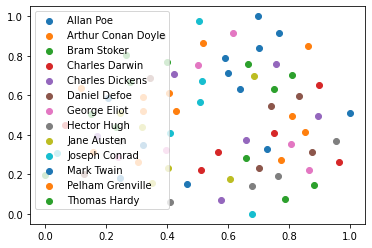

In [39]:

# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)

# for every class, we'll add a scatter plot separately
for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(labels) if l == label]

    # extract the coordinates of the points of this class only
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)

    # convert the class color to matplotlib format
    color = colors_per_class[label]

    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, c=color, label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')

# finally, show the plot
plt.show()

# Training with SVM

In [40]:
import classifierv2

In [41]:
obj = classifierv2.Classification(X, y)
scores = obj.classification()

[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 6  8 12  3  6  2  5  3 11  1  0 12 10  4 10 11]
Score 0.1875
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [11  0  2  6  0  0 11  0 11  0  4  4  4  0  0  6]
Score 0.0
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [12  6 10 10 10 12 12 10  5 12 12 12 12 12 12  6]
Score 0.0625
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [11  6  3 10  2  4  7  2 11  0  4  0  3  4  2  7]
Score 0.0
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 0  0  2  2  2  7  7  6 12  7  0  2  6  2  6  7]
Score 0.0
